Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
data_2d = pd.read_csv('data_2d.csv').values
mnist = pd.read_csv('mnist.csv')
data_mnist = pd.DataFrame(mnist/255.0).values
data_mnist

array([[0.00784314, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01568627, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02352941, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

/home/nomad/.cache/pypoetry/virtualenvs/python-data-science-mufRuuPf-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nomad/.cache/pypoetry/virtualenvs/python-data-science-mufRuuPf-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nomad/.cache/pypoetry/virtualenvs/python-data-science-mufRuuPf-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_

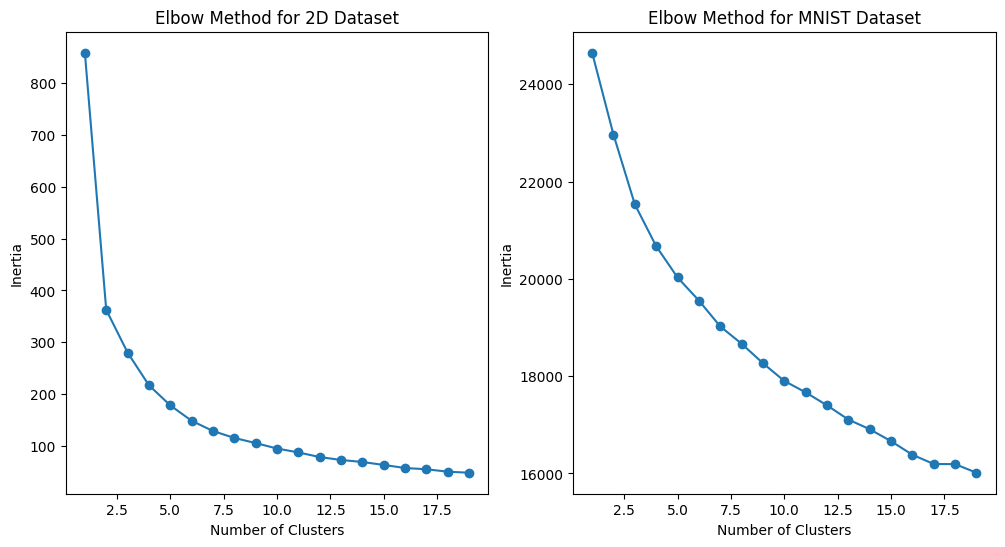

In [22]:
# Для двохмерного датасета
inertia_2d = []
for n_clusters in range(1, 20):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_2d)
    inertia_2d.append(kmeans.inertia_)

# Для mnist датасета
inertia_mnist = []
for n_clusters in range(1, 20):
    kmeans = KMeans(n_clusters=n_clusters, verbose=0)
    kmeans.fit(data_mnist)
    inertia_mnist.append(kmeans.inertia_)

# Визуализация локтевого метода
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 20), inertia_2d, marker='o')
plt.title('Elbow Method for 2D Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(1, 20), inertia_mnist, marker='o')
plt.title('Elbow Method for MNIST Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [23]:
# Для двохмерного датасета
kmeans_2d = KMeans(n_clusters=2)  
kmeans_2d.fit(data_2d)
labels_2d = kmeans_2d.labels_

# Для mnist датасета
pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(data_mnist)
kmeans_mnist = KMeans(n_clusters=10)
kmeans_mnist.fit(data_mnist_pca)
labels_mnist = kmeans_mnist.labels_

/home/nomad/.cache/pypoetry/virtualenvs/python-data-science-mufRuuPf-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nomad/.cache/pypoetry/virtualenvs/python-data-science-mufRuuPf-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


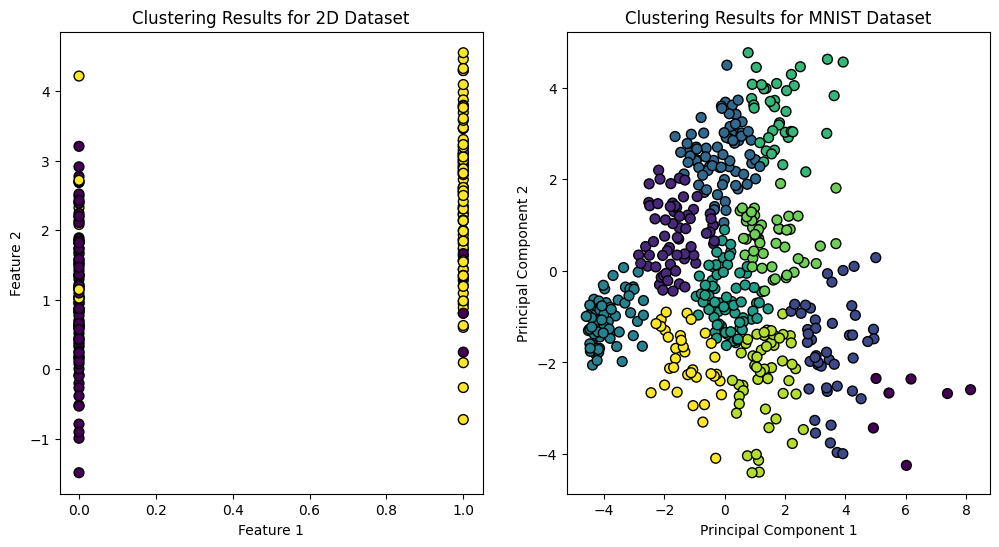

In [24]:
# Для двохмерного датасета
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_2d, cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering Results for 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Для mnist датасета
plt.subplot(1, 2, 2)
plt.scatter(data_mnist_pca[:, 0], data_mnist_pca[:, 1], c=labels_mnist, cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering Results for MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()